# 1-2: Installing Libraries and Adding Quandl Data

In [1]:
# Import libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
quandl.ApiConfig.api_key = "tFrP_Qy6kVgMcGPsjzDV"

In [3]:
# Fetch World Bank Data
wb_data = quandl.get_table("WB/DATA")
wb_metadata = quandl.get_table("WB/METADATA")

# Preview the data
print("World Bank Data:")
print(wb_data.head())
print("World Bank Metadata:")
print(wb_metadata.head())

World Bank Data:
           series_id country_code country_name  year  value
None                                                       
0     VC.PKP.TOTL.UN          XKX       Kosovo  2017  357.0
1     VC.PKP.TOTL.UN          XKX       Kosovo  2016  462.0
2     VC.PKP.TOTL.UN          XKX       Kosovo  2015  640.0
3     VC.PKP.TOTL.UN          XKX       Kosovo  2014  736.0
4     VC.PKP.TOTL.UN          XKX       Kosovo  2013  756.0
World Bank Metadata:
              series_id                                               name  \
None                                                                         
0        VC.PKP.TOTL.UN  Presence of peace keepers (number of troops, p...   
1        VC.IHR.PSRC.P5         Intentional homicides (per 100,000 people)   
2     VC.IHR.PSRC.MA.P5     Intentional homicides, male (per 100,000 male)   
3     VC.IHR.PSRC.FE.P5  Intentional homicides, female (per 100,000 fem...   
4           VC.IDP.TOCV  Internally displaced persons, total displaced ...

In [4]:
print(wb_data.shape)
print(wb_data.columns)

(10000, 5)
Index(['series_id', 'country_code', 'country_name', 'year', 'value'], dtype='object')


In [5]:
print(wb_metadata.shape)
print(wb_metadata.columns)

(1484, 3)
Index(['series_id', 'name', 'description'], dtype='object')


In [6]:
print(wb_data.isna().sum())

series_id       0
country_code    0
country_name    0
year            0
value           0
dtype: int64


In [7]:
print(wb_metadata.isna().sum())

series_id      0
name           0
description    0
dtype: int64


In [8]:
# Get the count of each country code
country_code_counts = wb_data['country_code'].value_counts()

# Print the counts
print(country_code_counts)

country_code
COL    96
CAN    96
RUS    96
JPN    96
DNK    96
       ..
NGA     2
ERI     1
ETH     1
BEN     1
SEN     1
Name: count, Length: 249, dtype: int64


# 3: Create subset of data

In [9]:
# Subset data: Intentional homicides (VC.IHR.PSRC.P5) for USA, CAN, and RUS
subset_data = wb_data[(wb_data['series_id'] == 'VC.IHR.PSRC.P5') & 
                      (wb_data['country_code'].isin(['USA', 'CAN', 'RUS']))]

In [10]:
# Merge with metadata for clarity
subset_data = subset_data.merge(wb_metadata, on='series_id', how='left')

In [11]:
# Reset index and set 'year' as index, and keep 'country_code'
subset_data = subset_data[['year', 'country_code', 'value', 'name', 'description']]
subset_data['year'] = pd.to_datetime(subset_data['year'], format='%Y')
subset_data.set_index('year', inplace=True)

In [12]:
# Handle missing values by forward filling or dropping
subset_data['value'].fillna(method='ffill', inplace=True)

In [13]:
# Preview subset data
print("Subset Data:")
print(subset_data.head())
print(subset_data.shape)

Subset Data:
           country_code     value                                        name  \
year                                                                            
2021-01-01          USA  6.807466  Intentional homicides (per 100,000 people)   
2020-01-01          USA  6.420751  Intentional homicides (per 100,000 people)   
2019-01-01          USA  4.985947  Intentional homicides (per 100,000 people)   
2018-01-01          USA  4.929848  Intentional homicides (per 100,000 people)   
2017-01-01          USA  5.243924  Intentional homicides (per 100,000 people)   

                                                  description  
year                                                           
2021-01-01  Intentional homicides are estimates of unlawfu...  
2020-01-01  Intentional homicides are estimates of unlawfu...  
2019-01-01  Intentional homicides are estimates of unlawfu...  
2018-01-01  Intentional homicides are estimates of unlawfu...  
2017-01-01  Intentional homicides a

In [14]:
print(subset_data.isna().sum())

country_code    0
value           0
name            0
description     0
dtype: int64


# 4: Create a line chart of my subset data

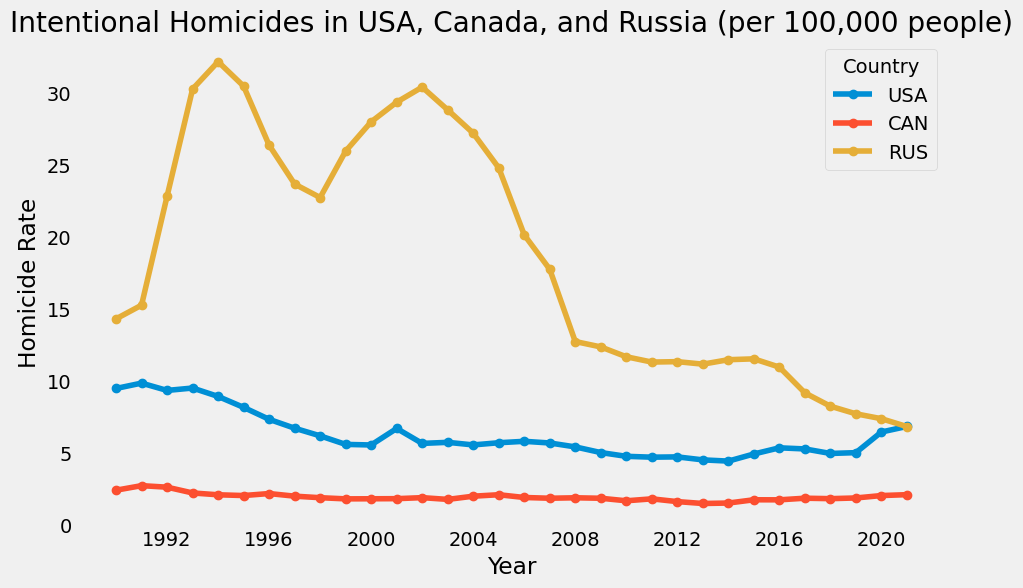

In [15]:
# Plot for each country separately
plt.figure(figsize=(10, 6))

for country in ['USA', 'CAN', 'RUS']:
    country_data = subset_data[subset_data['country_code'] == country]
    plt.plot(country_data.index, country_data['value'], marker='o', label=country)

# Add title, labels, and grid
plt.title("Intentional Homicides in USA, Canada, and Russia (per 100,000 people)")
plt.xlabel("Year")
plt.ylabel("Homicide Rate")
plt.grid()

# Display the legend
plt.legend(title="Country")

# Show the plot
plt.show()

## Country-Specific Analysis

## Russia : 
Trend:
Russia's trend exhibits a significant rise in the early 1990s, followed by a peak between 1998 and 2005, then a steady decline until 2020.
This likely reflects:
Economic turmoil after the collapse of the Soviet Union (early 1990s).
A recovery driven by rising oil prices and exports in the early 2000s.
Decline post-2008 due to the global financial crisis, oil price drops, and later sanctions.
Seasonality: Negligible, indicating that no cyclical or recurring patterns are evident in the data.
Residuals: Almost zero, implying that most variations in the data are captured by the trend component.

## USA :
Trend:
The USA's trend starts with moderate growth, peaking around 2000-2005, and shows a decline post-2008.
This corresponds to:
Economic expansion during the late 1990s tech boom.
A significant slowdown due to the 2008 financial crisis, followed by a gradual recovery.
Seasonality: Negligible, indicating that the data does not show significant recurring annual cycles.
Residuals: Minimal, suggesting a consistent pattern with little random fluctuation.

## Canada :
Trend:
Canada’s trend mirrors global economic shifts, with a steady increase until around 2005, followed by a decline post-2008.
Likely driven by:
Rising global demand for natural resources (oil, gas, metals) in the early 2000s.
Economic challenges after the 2008 crisis, including volatile resource markets.
Seasonality: Again, negligible seasonality implies no regular yearly patterns in the data.
Residuals: Low residuals suggest that the data fits well into the trend, with little unexplained variability.


## Overall Comparison:
All three countries exhibit similar long-term trends:
Growth through the 1990s and early 2000s.
Decline post-2008, aligning with global economic challenges like the financial crisis and commodity price fluctuations.
The lack of seasonality across all countries implies that the data's variations are not cyclical.
Minimal residuals indicate the trends explain most of the variance in the data.


# 5: Decomposing data

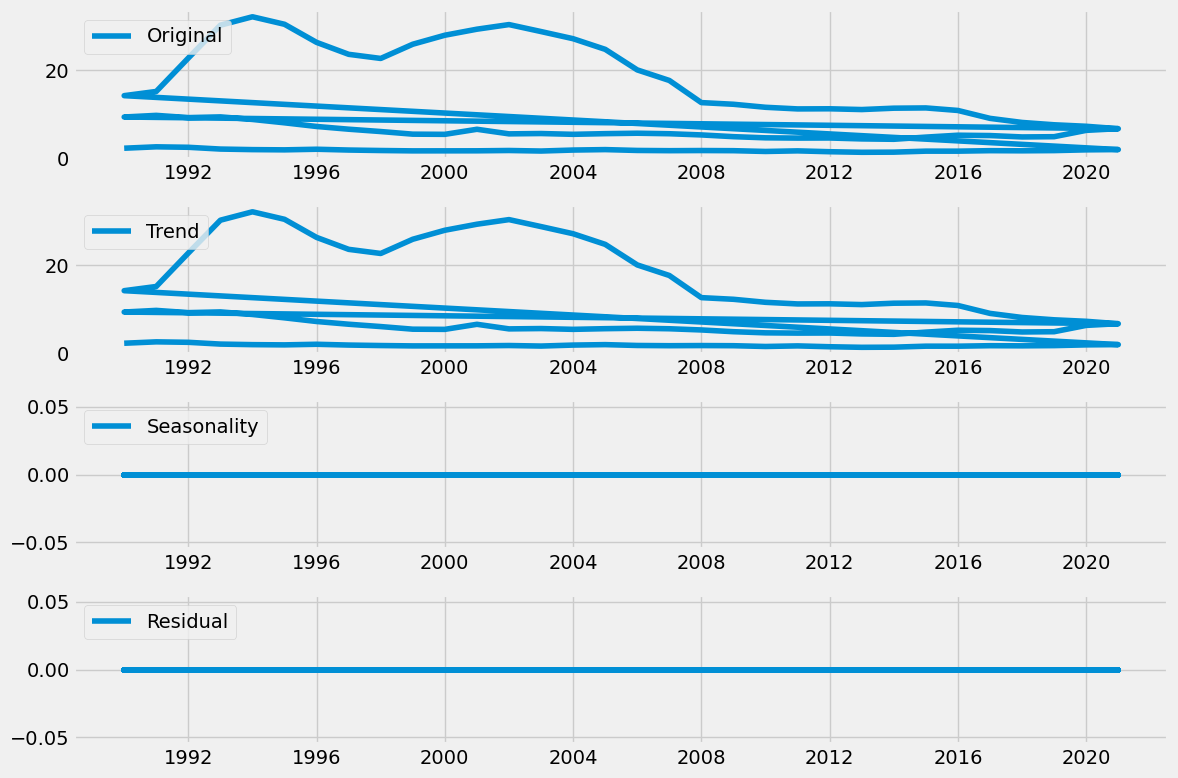

In [17]:
# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(subset_data['value'], model='additive', period=1)

# Plot decomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(subset_data['value'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


# 6: Perform the Dickey-Fuller test

In [18]:
from statsmodels.tsa.stattools import adfuller
# Function to perform Dickey-Fuller Test
def adf_test(series):
    result = adfuller(series.dropna(), autolag='AIC')
    print("ADF Statistic: {:.4f}".format(result[0]))
    print("p-value: {:.4f}".format(result[1]))
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value:.4f}")
    if result[1] <= 0.05:
        print("Conclusion: Reject the null hypothesis - The data is stationary.")
    else:
        print("Conclusion: Fail to reject the null hypothesis - The data is non-stationary.")

# Perform the ADF test
print("Dickey-Fuller Test Results:")
adf_test(subset_data['value'])

Dickey-Fuller Test Results:
ADF Statistic: -1.9826
p-value: 0.2943
Critical Values:
   1%: -3.5069
   5%: -2.8950
   10%: -2.5846
Conclusion: Fail to reject the null hypothesis - The data is non-stationary.


## Interpretation:
ADF Statistic: -1.9826 — This value is compared to the critical values to determine the stationarity of the series.
p-value: 0.2943 — This p-value is greater than the common threshold of 0.05, indicating that the null hypothesis (the series is non-stationary) cannot be rejected.
Critical Values: At the 1%, 5%, and 10% levels, the critical values are:
1%: -3.5069
5%: -2.8950
10%: -2.5846
The ADF statistic (-1.9826) is greater than the critical value at the 5% significance level (-2.8950), meaning we fail to reject the null hypothesis.
Conclusion:
Since the p-value is greater than 0.05, and the ADF statistic is not more negative than the critical values at common confidence levels, we fail to reject the null hypothesis. This implies that the data is non-stationary.

# 7: Apply differencing to make the data more stationary

In [20]:
# Apply first-order differencing
subset_data['value_diff'] = subset_data['value'].diff()

In [21]:
print(subset_data.isna().sum())

country_code    0
value           0
name            0
description     0
value_diff      1
dtype: int64


In [22]:
subset_data = subset_data.dropna(subset=['value_diff'])

In [23]:
subset_data.head()

country_code     value                                        name  \
year                                                                            
2020-01-01          USA  6.420751  Intentional homicides (per 100,000 people)   
2019-01-01          USA  4.985947  Intentional homicides (per 100,000 people)   
2018-01-01          USA  4.929848  Intentional homicides (per 100,000 people)   
2017-01-01          USA  5.243924  Intentional homicides (per 100,000 people)   
2016-01-01          USA  5.321656  Intentional homicides (per 100,000 people)   

                                                  description  value_diff  
year                                                                       
2020-01-01  Intentional homicides are estimates of unlawfu...   -0.386715  
2019-01-01  Intentional homicides are estimates of unlawfu...   -1.434805  
2018-01-01  Intentional homicides are estimates of unlawfu...   -0.056098  
2017-01-01  Intentional homicides are estimates of unlawfu...    0.314075  
2016-01-01  Intentional homicides are estimates of unlawfu...    0.077732

In [24]:
subset_data.shape

(95, 5)

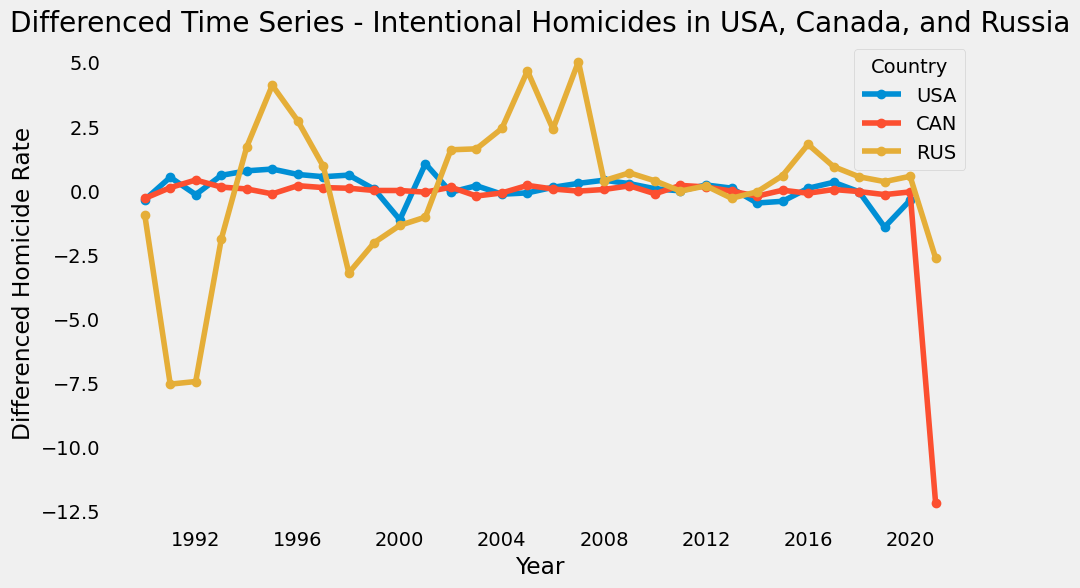

In [25]:
# Plot differenced data for each country separately
plt.figure(figsize=(10, 6))

for country in ['USA', 'CAN', 'RUS']:
    country_data = subset_data[subset_data['country_code'] == country]
    plt.plot(country_data.index, country_data['value_diff'], marker='o', label=country)

# Add title, labels, and grid
plt.title("Differenced Time Series - Intentional Homicides in USA, Canada, and Russia")
plt.xlabel("Year")
plt.ylabel("Differenced Homicide Rate")
plt.grid()

# Display the legend
plt.legend(title="Country")

# Show the plot
plt.show()


In [26]:
# ADF test on differenced data
print("Dickey-Fuller Test on Differenced Data:")
adf_test(subset_data['value_diff'])

Dickey-Fuller Test on Differenced Data:
ADF Statistic: -4.9635
p-value: 0.0000
Critical Values:
   1%: -3.5043
   5%: -2.8939
   10%: -2.5840
Conclusion: Reject the null hypothesis - The data is stationary.


## Interpretation

ADF Statistic: -4.9635

The ADF statistic is compared to the critical values at various significance levels to determine if the time series is stationary. In this case, the ADF statistic of -4.9635 is more negative than the critical values at the 1%, 5%, and 10% levels, indicating that the series is likely stationary.
p-value: 0.0000

The p-value is very low (less than 0.05), which means we can reject the null hypothesis that the series has a unit root (i.e., it is non-stationary). This strongly suggests that the differenced data is stationary.
Critical Values:

The critical values at the 1%, 5%, and 10% significance levels are:
1%: -3.5043
5%: -2.8939
10%: -2.5840
The ADF statistic (-4.9635) is more negative than all these values, confirming that the differenced data is stationary.
Conclusion:
Since the p-value is less than 0.05 and the ADF statistic is more negative than the critical values at common confidence levels, we reject the null hypothesis. Therefore, the differenced data is stationary.

# 9: Check for data's autocorrelations

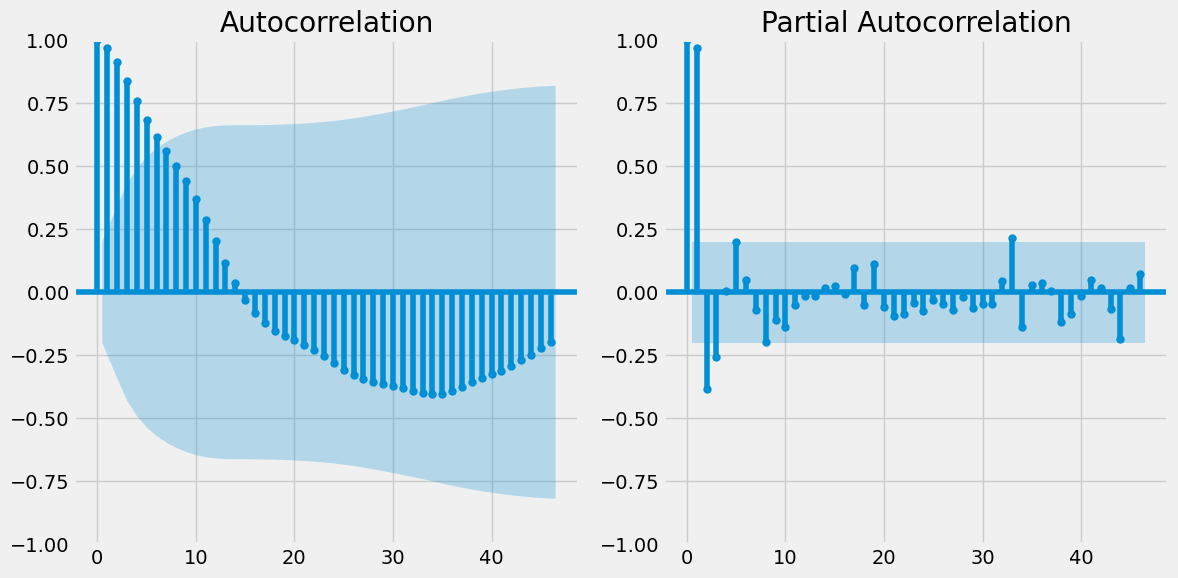

In [28]:
# Import necessary functions for autocorrelation and partial autocorrelation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Autocorrelation and Partial Autocorrelation Plots with adjusted lags
max_lags = len(subset_data['value'].dropna()) // 2 - 1  # Set the max lags to less than half the number of data points
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(subset_data['value'].dropna(), lags=max_lags, ax=plt.gca())
plt.subplot(122)
plot_pacf(subset_data['value'].dropna(), lags=max_lags, ax=plt.gca())

plt.tight_layout()
plt.show()

In [29]:
# Build ARIMA Model
# Since the data may not be stationary, ARIMA model can help us forecast.
# We are assuming p=1, d=1, q=1 based on autocorrelation and differencing.

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(subset_data['value'], order=(1, 1, 1))  # Adjust p, d, q if necessary
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Forecast next 5 years
forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   95
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -191.545
Date:                Wed, 18 Dec 2024   AIC                            389.089
Time:                        19:59:33   BIC                            396.719
Sample:                             0   HQIC                           392.171
                                 - 95                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6286      0.092      6.852      0.000       0.449       0.808
ma.L1         -0.2602      0.107     -2.424      0.015      -0.471      -0.050
sigma2         3.4392      0.244     14.083      0.0

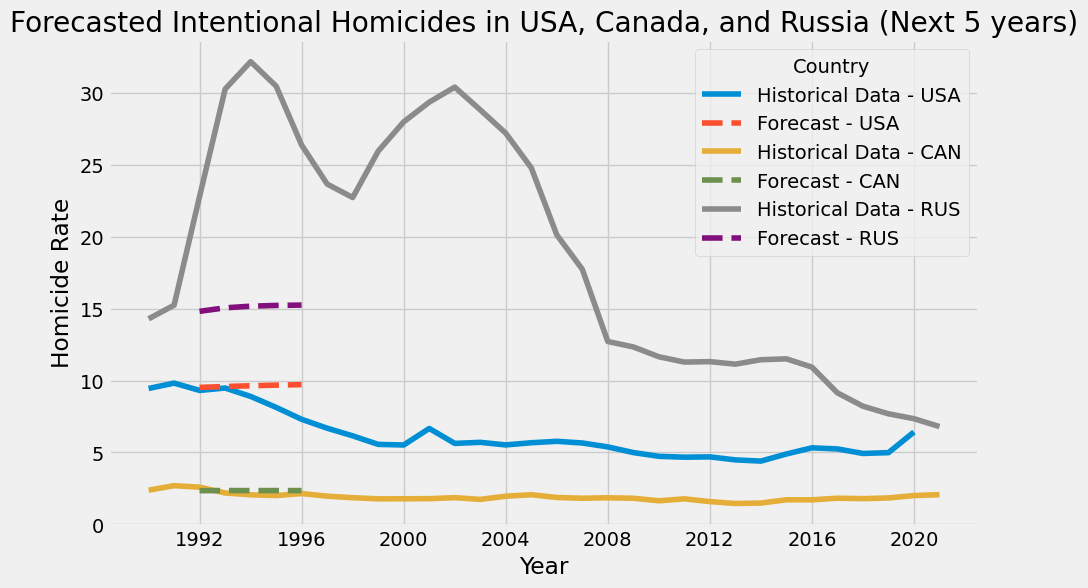

In [30]:
# Forecasting for 3 countries (USA, CAN, RUS)

# Create an empty plot for all countries
plt.figure(figsize=(10, 6))

# Loop through each country
for country in ['USA', 'CAN', 'RUS']:
    # Filter historical data for each country
    country_data = subset_data[subset_data['country_code'] == country]
    
    # Build ARIMA model for each country's historical data
    model = ARIMA(country_data['value'], order=(1, 1, 1))  # Adjust p, d, q if necessary
    model_fit = model.fit()

    # Forecast the next 5 years
    forecast_steps = 5
    forecast = model_fit.forecast(steps=forecast_steps)

    # Create forecast index (next 5 years)
    forecast_index = pd.date_range(country_data.index[-1] + pd.Timedelta(days=365), periods=forecast_steps, freq='Y')

    # Plot historical data and forecasted data for the country
    plt.plot(country_data.index, country_data['value'], label=f'Historical Data - {country}')
    plt.plot(forecast_index, forecast, label=f'Forecast - {country}', linestyle='--')

# Add title, labels, and grid
plt.title("Forecasted Intentional Homicides in USA, Canada, and Russia (Next 5 years)")
plt.xlabel("Year")
plt.ylabel("Homicide Rate")
plt.legend(title="Country")

# Display grid
plt.grid(True)

# Show the plot
plt.show()


In [31]:
from sklearn.metrics import mean_squared_error


# Evaluate Model - Calculate RMSE
forecast_actual = subset_data['value'][-forecast_steps:].values
rmse = np.sqrt(mean_squared_error(forecast_actual, forecast))
print(f"Root Mean Squared Error (RMSE) of the Forecast: {rmse:.4f}")

Root Mean Squared Error (RMSE) of the Forecast: 12.7207


In [ ]:
# creating path to export
path= r'/Users/evancarr/Desktop/New York Python Project/02 Prepared Data'

# Exporting as pkl file
df.to_pickle(os.path.join(path, '6.6 Time Series Analysis.pkl'))